In [11]:
import os
import warnings

import matplotlib.pyplot as plt
import numpy as np

warnings.simplefilter("ignore")

plt.style.use('seaborn')
plt.style.use('seaborn-notebook')

from soma.generators.nmist import NmistGenerator
from soma.generators.normal import MultivariateNormalGenerator
from soma.generators.dc2 import DC2Generator
from soma.tests import som_test, knn_test, c2s_knn_test, c2s_nn_test
from soma.util.errors import stat_errors_vs_dimension
from soma.util.plot import plot_errors, plot_time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
plot_dir = os.path.expanduser('~/Plots/power_dim')
os.makedirs(plot_dir, exist_ok=True)

In [3]:
tests = {
    'knn': knn_test,
    'som': som_test,
    'c2st_knn': c2s_knn_test,
    'c2st_nn': c2s_nn_test,
}

In [5]:
samples = 500
repeat = 200
significance = 0.1

# DC2 MAG Filtered

In [6]:
dc2 = DC2Generator()
dc2_abs = DC2Generator(abs_mag=22)
dc2_abs.dimensions

107

In [7]:
dc2_results = stat_errors_vs_dimension(dc2_abs, dc2, tests, alpha=significance, samples=samples, repeat=repeat, step=10)
dc2_results.to_csv('../results/dimensionality/dc2_mag_dim.csv')

  0%|          | 0/12 [00:00<?, ?it/s]

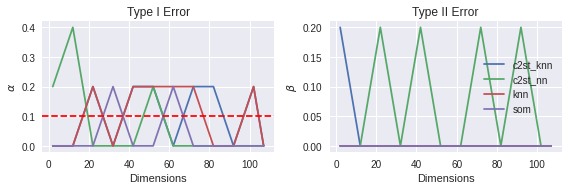

In [9]:
dc2_abs_fig = plot_errors(dc2_results)
dc2_abs_fig.savefig(os.path.join(plot_dir, 'dc2_mag_power_dim.eps'))

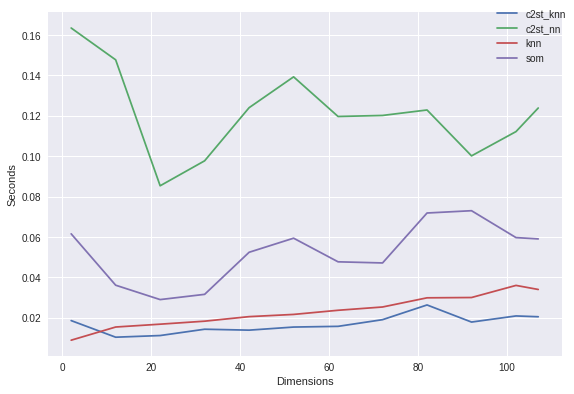

In [13]:
dc2_time_fig = plot_time(dc2_results)
dc2_time_fig.savefig(os.path.join(plot_dir, 'dc2_mag_time_dim.eps'))

# DC2 SNR

In [14]:
dc2_snr = DC2Generator(snr=10)

In [15]:
dc2_snr_results = stat_errors_vs_dimension(dc2_snr, dc2, tests, alpha=significance, samples=samples, repeat=repeat, step=10)
dc2_snr_results.to_csv('../results/dimensionality/dc2_snr_dim.csv')

  0%|          | 0/12 [00:00<?, ?it/s]

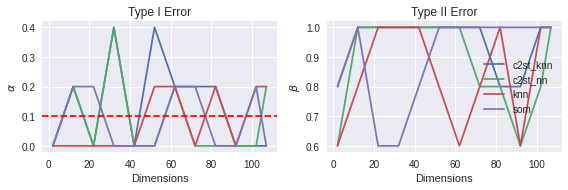

In [16]:
dc2_snr_fig = plot_errors(dc2_snr_results)
dc2_snr_fig.savefig(os.path.join(plot_dir, 'dc2_snr_power_dim.eps'))

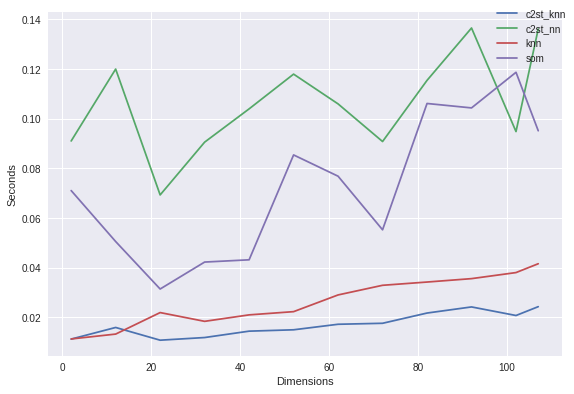

In [18]:
dc2_snr_time_fig = plot_time(dc2_snr_results)
dc2_snr_time_fig.savefig(os.path.join(plot_dir, 'dc2_snr_time_dim.eps'))

# NMIST

In [19]:
nmist2 = NmistGenerator(2)
nmist3 = NmistGenerator(3)
nmist3.dimensions

784

In [20]:
nmist_results = stat_errors_vs_dimension(nmist2, nmist3, tests, alpha=significance, samples=samples, repeat=repeat, step=50)
nmist_results.to_csv('../results/dimensionality/nmist_dim.csv')

  0%|          | 0/17 [00:00<?, ?it/s]

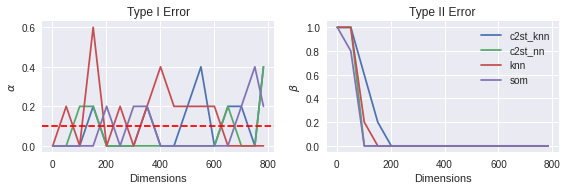

In [21]:
nmist_fig = plot_errors(nmist_results)
nmist_fig.savefig(os.path.join(plot_dir, 'nmist_power_dim.eps'))

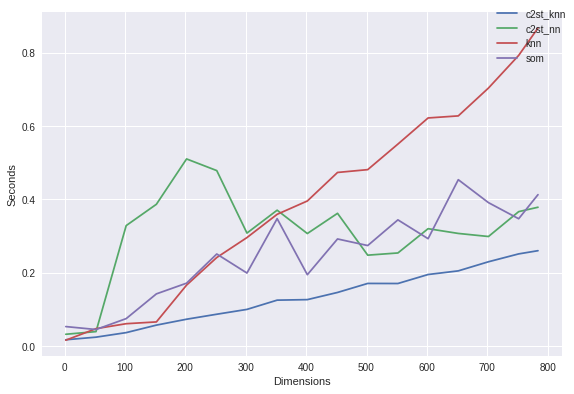

In [22]:
nmist_time_fig = plot_time(nmist_results)
nmist_time_fig.savefig(os.path.join(plot_dir, 'nmist_time_dim.eps'))

# Normal (location)

In [23]:
means = np.zeros(1000)
means2 = np.ones(1000)

n1 = MultivariateNormalGenerator(means, cov=np.diag(np.ones(1000)))
n2 = MultivariateNormalGenerator(means2, cov=np.diag(np.ones(1000)))

In [25]:
normal_loc_results = stat_errors_vs_dimension(n2, n1, tests, alpha=significance, samples=samples, repeat=repeat, step=100)
normal_loc_results.to_csv('../results/dimensionality/normal_results_dim.csv')

  0%|          | 0/11 [00:00<?, ?it/s]

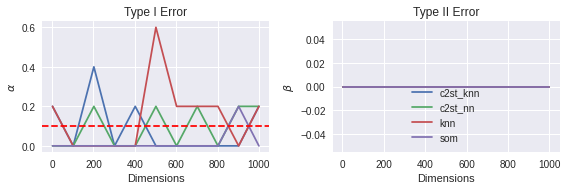

In [26]:
normal_loc_fig = plot_errors(normal_loc_results)
normal_loc_fig.savefig(os.path.join(plot_dir, 'normal_111_power_dim.eps'))

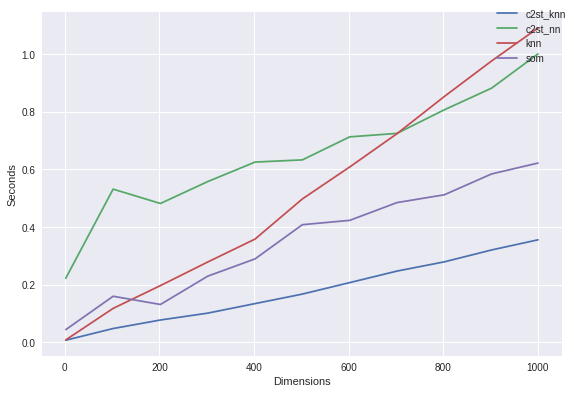

In [27]:
normal_loc_time_fig = plot_time(normal_loc_results)
normal_loc_time_fig.savefig(os.path.join(plot_dir, 'normal_111_time_dim.eps'))

# Normal (location, fair)

In [28]:
means3 = np.zeros(1000)
means2[0] = 1.

n3 = MultivariateNormalGenerator(means3, cov=np.diag(np.ones(1000)))

In [29]:
n3_results = stat_errors_vs_dimension(n3, n1, tests, alpha=significance, samples=samples, repeat=repeat, step=100)

  0%|          | 0/11 [00:00<?, ?it/s]

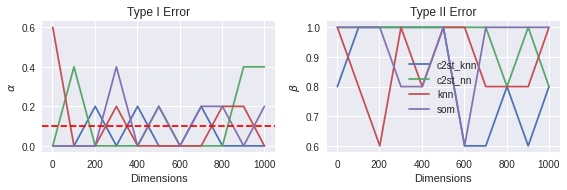

In [30]:
normal_fair_fig = plot_errors(n3_results)
normal_fair_fig.savefig(os.path.join(plot_dir, 'normal_fair_power_dim.eps'))

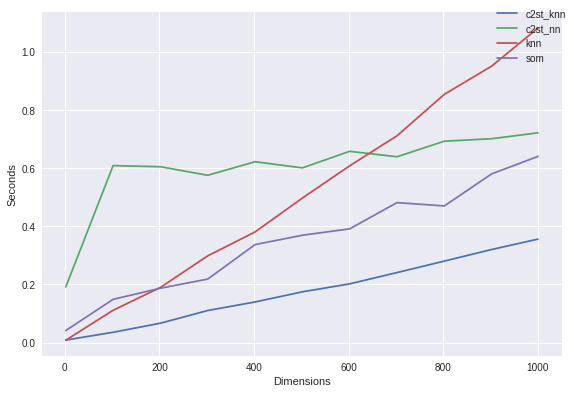

In [31]:
normal_fair_time_fig = plot_time(n3_results)
normal_fair_time_fig.savefig(os.path.join(plot_dir, 'normal_fair_time_dim.eps'))

# Normal (scale)

In [32]:
ns1 = MultivariateNormalGenerator(means, wishart_df=len(means)+1)
ns2 = MultivariateNormalGenerator(means, wishart_df=len(means)+1)

In [33]:
ns_results = stat_errors_vs_dimension(ns1, ns2, tests, alpha=significance, samples=samples, repeat=repeat, step=100)
ns_results.to_csv('../results/dimensionality/normal_scale_dim.csv')

  0%|          | 0/11 [00:00<?, ?it/s]

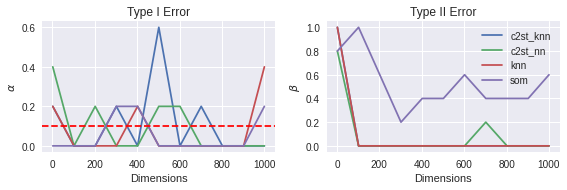

In [34]:
normal_scale_fig = plot_errors(ns_results)
normal_scale_fig.savefig(os.path.join(plot_dir, 'normal_scale_power_dim.eps'))

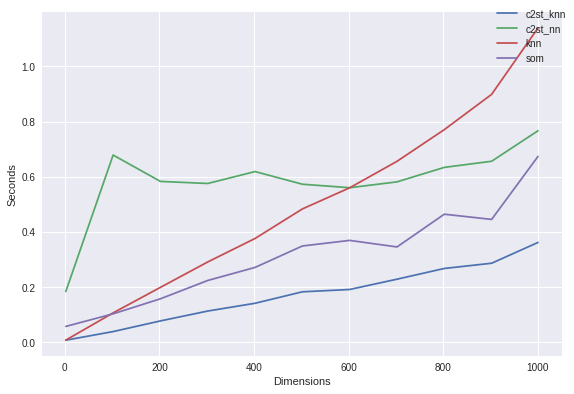

In [35]:
normal_scale_time_fig = plot_time(ns_results)
normal_scale_time_fig.savefig(os.path.join(plot_dir, 'normal_scale_time_dim.eps'))

# Normal (scale, fair)

In [36]:
nsf1 = MultivariateNormalGenerator(means, wishart_df=len(means)*32)
nsf2 = MultivariateNormalGenerator(means, wishart_df=len(means)*32)

In [37]:
nsf_results = stat_errors_vs_dimension(nsf1, nsf2, tests, alpha=significance, samples=samples, repeat=repeat, step=100)
nsf_results.to_csv('../results/dimensionality/normal_scale_fair_dim.csv')

  0%|          | 0/11 [00:00<?, ?it/s]

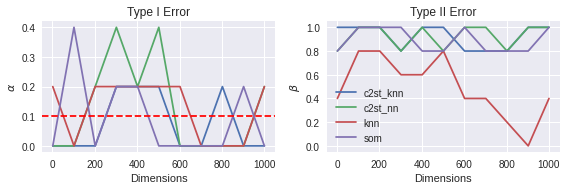

In [41]:
normal_scale_fair_fig = plot_errors(nsf_results)
normal_scale_fair_fig.savefig(os.path.join(plot_dir, 'normal_scale_fair_power_dim.eps'))

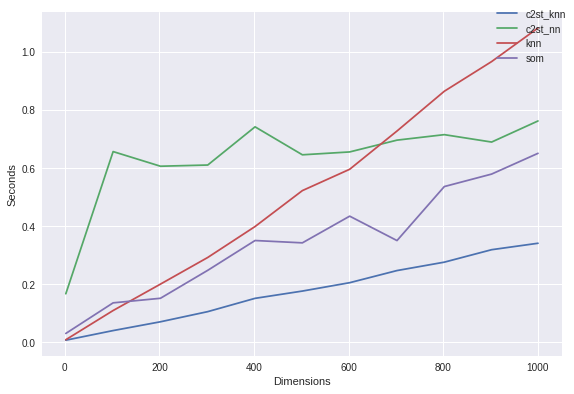

In [42]:
normal_scale_fair_time_fig = plot_time(nsf_results)
normal_scale_fair_time_fig.savefig(os.path.join(plot_dir, 'normal_scale_fair_time_dim.eps'))